Youtube Comments Summarizer  Pipeline:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from haystack import Pipeline, component
from haystack import component
from haystack.components.builders import PromptBuilder

import pandas as pd

In [4]:

@component
class ReviewData:

    @component.output_types(reviews=str)
    def run(self, csv_file_path: str):
        """
        run reads in an csv with fields author and comment and converts it into a dictionary.

        :param csv_file_path: path to csv file
        :return: dictionary with contents of the csv file
        """ 

        dataframe1 = pd.read_csv(csv_file_path)
        return {"reviews": dataframe1[["author","comment"]].head(10).to_dict("records")}

review_data = ReviewData()

output = review_data.run(csv_file_path="comments-2024-08-31 22:51:22.924448.csv")
output["reviews"]

[{'author': '@user-jz4oz3bx3n',
  'comment': 'her lyrics are so unserious  I LOOOVE IT'},
 {'author': '@Bentleytee',
  'comment': '1:02 “come right on me, I mean camaraderie” okay girl you deserve album of the year.'},
 {'author': '@daisyfield7238',
  'comment': '“Where art though? Why not uponeth me?” Is peak lyricism  '},
 {'author': '@j_localxxo',
  'comment': "come right on me. i mean camaraderie she's so unserious i love her . but the song is really good too "},
 {'author': '@SwitchxZ0NE',
  'comment': "This song makes me feel like I'm part of a retro summer movie and I LOVE IT"},
 {'author': '@lehhe1818',
  'comment': "who's the cute boy with the white jacket and the thick accent? IS SO GOOOOOOOD"},
 {'author': '@amelia4974',
  'comment': '“where art thou? why not uponeth me?” REAL'},
 {'author': '@The_editz0318',
  'comment': '“And I bet the temp is 69” that was slick girl, that was slick. '},
 {'author': '@DeffNotScar',
  'comment': 'THE BEAT IS SO EARLY 2000s - 90s \nI LOVE YO

In [5]:
from haystack_integrations.components.generators.amazon_bedrock import AmazonBedrockGenerator

generator = AmazonBedrockGenerator(
        model="amazon.titan-text-lite-v1",
        max_length=99
)

In [6]:
review_data = ReviewData()

template = """You will be provided a few of the top comments for a youtube video. Based on the comments, Summerize what people think of the video.
Comments:  
{% for review in reviews %}
  Comment:\n
  {{ review['author'] }} wrote {{ review['comment'] }}
{% endfor %}  
"""
prompt1 = PromptBuilder(template=template)
print(prompt1.run(template_variables={"reviews": review_data.run(csv_file_path="comments-2024-08-31 22:51:22.924448.csv")["reviews"] }))


{'prompt': "You will be provided a few of the top comments for a youtube video. Based on the comments, Summerize what people think of the video.\nComments:  \n\n  Comment:\n\n  @user-jz4oz3bx3n wrote her lyrics are so unserious  I LOOOVE IT\n\n  Comment:\n\n  @Bentleytee wrote 1:02 “come right on me, I mean camaraderie” okay girl you deserve album of the year.\n\n  Comment:\n\n  @daisyfield7238 wrote “Where art though? Why not uponeth me?” Is peak lyricism  \n\n  Comment:\n\n  @j_localxxo wrote come right on me. i mean camaraderie she's so unserious i love her . but the song is really good too \n\n  Comment:\n\n  @SwitchxZ0NE wrote This song makes me feel like I'm part of a retro summer movie and I LOVE IT\n\n  Comment:\n\n  @lehhe1818 wrote who's the cute boy with the white jacket and the thick accent? IS SO GOOOOOOOD\n\n  Comment:\n\n  @amelia4974 wrote “where art thou? why not uponeth me?” REAL\n\n  Comment:\n\n  @The_editz0318 wrote “And I bet the temp is 69” that was slick girl, t

In [7]:
review_data = ReviewData()

template = """You will be provided a few of the top comments for a youtube video. Based on the comments, Summerize what people think of the video.
Comments:  
{% for review in reviews %}
  Comment:\n
  {{ review['author'] }} wrote {{ review['comment'] }}
{% endfor %}  
"""
prompt1 = PromptBuilder(template=template)

dialogue_builder1 = Pipeline()
dialogue_builder1.add_component("review_data", review_data)
dialogue_builder1.add_component("prompt", prompt1)
dialogue_builder1.add_component("llm", generator)

dialogue_builder1.connect("review_data.reviews", "prompt.reviews")
dialogue_builder1.connect("prompt", "llm")

🚅 Components
  - review_data: ReviewData
  - prompt: PromptBuilder
  - llm: AmazonBedrockGenerator
🛤️ Connections
  - review_data.reviews -> prompt.reviews (str)
  - prompt.prompt -> llm.prompt (str)

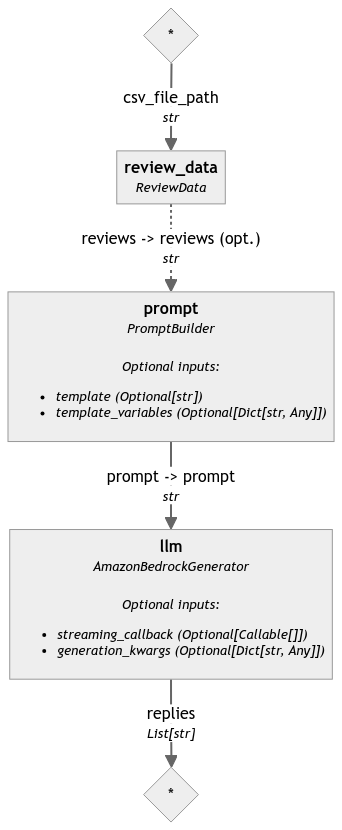

In [8]:
dialogue_builder1.show()

In [9]:
dialogue1 = dialogue_builder1.run({"review_data": {"csv_file_path":"comments-2024-08-31 22:51:22.924448.csv"}})

print(dialogue1["llm"])

{'replies': ["Based on the comments, people are praising the song for its witty lyrics and catchy beat. They also appreciate the artist's delivery and the retro summer movie vibe. Some commenters are also mentioning the song's early 2000s-90s sound, which they find appealing. Overall, people are expressing their love for the song and the artist's talent."]}
